<a href="https://colab.research.google.com/github/pawel0508/First_repository/blob/master/%C4%86wiczenia_18_podsumowanie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Science Bootcamp

### Spis treści:
* [Import biblioteki](#0)
* [Ćwiczenie 231](#1)
* [Ćwiczenie 232](#2)
* [Ćwiczenie 233](#3)
* [Ćwiczenie 234](#4)
* [Ćwiczenie 235](#5)
* [Ćwiczenie 236](#6)
* [Ćwiczenie 237](#7)
* [Ćwiczenie 238](#8)
* [Ćwiczenie 239](#9)
* [Ćwiczenie 240](#10)

### <a name='0'></a>Import biblioteki

In [55]:
import numpy as np
import pandas as pd

np.__version__

'1.18.5'

### <a name='1'></a> Ćwiczenie 231
Zaimportuj bibliotekę _tensorflow_ w wersji 2.x.

In [56]:
%tensorflow_version 2.x
import tensorflow as tf

tf.__version__

'2.3.0'

Załaduj dane Fashion MNIST wykorzystując bibliotekę _tensorflow_. Odpowiednio zbiór treningowy (_X\_train_, _y\_train_) oraz testowy (_X\_test_, _y\_test_).

In [57]:
from tensorflow.keras.datasets.mnist import load_data

(x_train, y_train), (x_test, y_test) = load_data()

In [58]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

Sprawdź rozmiar zbiorów treningowych i testowych.

In [59]:
print(f'x_train shape: {x_train.shape}')
print(f'x_test shape: {x_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

x_train shape: (60000, 28, 28)
x_test shape: (10000, 28, 28)
y_train shape: (60000,)
y_test shape: (10000,)


### <a name='2'></a> Ćwiczenie 232 
Wykorzytując bibliotekę _matplotlib_ wyświetl obraz ze zbioru treningowego z indeksem 40.

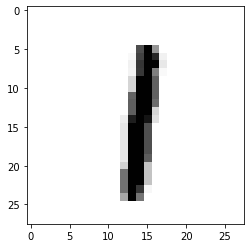

In [60]:
import matplotlib.pyplot as plt
plt.imshow(x_train[40], cmap = 'gray_r')

Wyświetl numer klasy dla próbki ze zbioru treningowego z ineksem 40.

In [61]:
y_train[40]

1

### <a name='3'></a> Ćwiczenie 233
Wystandaryzuj dane. Podziel wartości tablic _X\_train_ oraz _X\_test_ przez wartość 255.0.

In [62]:
x_train = x_train / 255.
x_test = x_test / 255.

### <a name='4'></a> Ćwiczenie 234
Zaimportuj klasę _Sequential_ z biblioteki _tensorflow_ wykorzystując pakiet _keras_.

In [63]:
from tensorflow.keras.models import Sequential

Zaimportuj warstwy _Flatten_ oraz _Dense_ z biblioteki _tensorflow_ wykorzystując pakiet _keras_.

In [64]:
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense

### <a name='5'></a> Ćwiczenie 235
Zbuduj model klasy _Sequential_.

In [65]:
model = Sequential()

Dodaj pierwszą warstwę typu _Flatten_ wraz z odpowiednio dobranym parametrem _input_shape_.

In [66]:
model.add(Flatten(input_shape = (28,28)))

Dodaj kolejną warstwę typu _Dense_ z 128 neuronami i funkcją aktywacji _relu_.

In [67]:
model.add(Dense(units = 128, activation='relu'))

Dodaj ostatnią warstwę typu _Dense_ z 10 neuronami i funkcją aktywacji _softmax_.

In [68]:
model.add(Dense(units = 10, activation='softmax'))

Wyświetl podsumowanie modelu.

In [69]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


### <a name='6'></a> Ćwiczenie 236
Skompiluj model. Wykorzystaj optymalizator _rmsprop_, funkcję straty _sparse_categorical_crossentropy_ oraz metrykę _accuracy_.

In [70]:
model.compile(optimizer = 'rmsprop',
              loss = 'sparse_categorical_crossentropy',
              metrics = 'accuracy')

### <a name='7'></a> Ćwiczenie 237
Dopasuj model do danych treningowych, ustawiając 10 epok oraz podział na zbiór walidacyjny wynoszący 0.2.

In [71]:
history = model.fit(x_train, y_train, epochs = 10, batch_size = 32, validation_split = 0.2)

Epoch 1/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2849 - accuracy: 0.9190 - val_loss: 0.1549 - val_accuracy: 0.9552
Epoch 2/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1348 - accuracy: 0.9605 - val_loss: 0.1291 - val_accuracy: 0.9634
Epoch 3/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0975 - accuracy: 0.9726 - val_loss: 0.1180 - val_accuracy: 0.9656
Epoch 4/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0767 - accuracy: 0.9779 - val_loss: 0.1072 - val_accuracy: 0.9713
Epoch 5/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0642 - accuracy: 0.9816 - val_loss: 0.1084 - val_accuracy: 0.9711
Epoch 6/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0552 - accuracy: 0.9843 - val_loss: 0.1071 - val_accuracy: 0.9724
Epoch 7/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0471 - accuracy: 0.9869 - val_loss: 0.1063 - val_accuracy:

### <a name='8'></a> Ćwiczenie 238
Dokonaj predykcji modelu na podstawie danych testowych.

In [72]:
y_pred = model.predict_classes(x_test)

Zbuduj macierz konfuzji (macierz pomyłek).

In [73]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[ 970,    0,    0,    2,    1,    1,    2,    2,    2,    0],
       [   0, 1124,    3,    0,    0,    1,    3,    1,    3,    0],
       [   3,    1,  996,    4,    1,    0,    2,   11,   14,    0],
       [   0,    0,    5,  988,    0,    5,    0,    5,    4,    3],
       [   1,    0,    2,    1,  959,    0,    3,    3,    1,   12],
       [   2,    0,    0,    8,    0,  864,    6,    3,    7,    2],
       [   5,    3,    1,    1,    9,    5,  933,    0,    1,    0],
       [   0,    4,    6,    6,    0,    2,    0, 1004,    2,    4],
       [   2,    1,    6,    4,    2,    6,    1,    3,  945,    4],
       [   4,    2,    1,    8,    6,    3,    0,    4,    1,  980]])

### <a name='9'></a> Ćwiczenie 239
Zbuduj obiekt pandas _DataFrame_ zawierający predykcje modelu. Nadaj nazwę kolumny _prediction_ i przypisz do zmiennej _results_.

In [74]:
results = pd.DataFrame(data = y_pred, columns = ['prediction'])
results

,prediction
0,7
1,2
2,1
3,0
4,4
...,...
9995,2
9996,3
9997,4
9998,5


Przypisz nową kolumnę z wartościami ze zmiennej _y\_test_ i nazwij ją _y\_test_.

In [75]:
results['y_test'] = y_test

Przypisz nową kolumnę o nazwie _is_misclassified_, która zwróci 1, gdy próbki zostaną błędnie sklasyfikowane, w przeciwnym przypadku 0.

In [76]:
results

,prediction,y_test
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
...,...,...
9995,2,2
9996,3,3
9997,4,4
9998,5,5


In [77]:
def is_misclassified(results):
  miss = []
  for i in range(len(results)):
    if results['prediction'][i] == results['y_test'][i]:
      miss.append(0)
    else:
      miss.append(1)
  return miss
# alternatywnie
# results['is_misclassified'] = (results['prediction'] != results['y_test']).astype('int')
# results

In [78]:
results['is_misclassified'] = is_misclassified(results)

In [79]:
results

,prediction,y_test,is_misclassified
0,7,7,0
1,2,2,0
2,1,1,0
3,0,0,0
4,4,4,0
...,...,...,...
9995,2,2,0
9996,3,3,0
9997,4,4,0
9998,5,5,0


### <a name='10'></a> Ćwiczenie 240
Zapisz obiekt _results_ do pliku _results.csv_.

In [80]:
results.to_csv('results.csv')

In [81]:
!head results.csv

,prediction,y_test,is_misclassified
0,7,7,0
1,2,2,0
2,1,1,0
3,0,0,0
4,4,4,0
5,1,1,0
6,4,4,0
7,9,9,0
8,5,5,0
